# K-Nearest Neighbors (KNN) Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Import the iris dataset as provided by the sklearn Python module
from sklearn.datasets import load_iris
iris = load_iris()

type(iris)

# Converting sklearn data into Pandas dataframe
# target variables imply
# 0.0 - Setosa
# 1.0 - Versicolor
# 2.0 - Virginica

iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Checking for outliers and imbalanced data

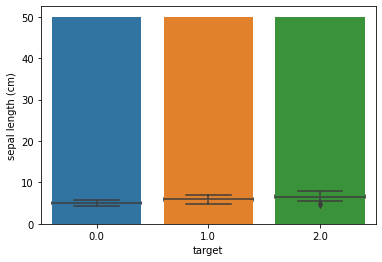

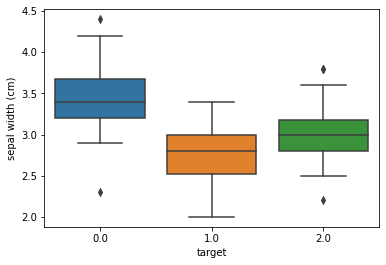

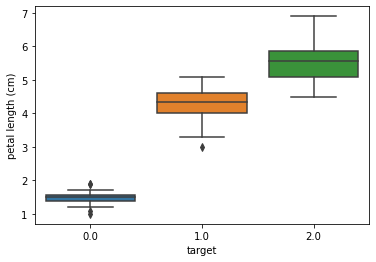

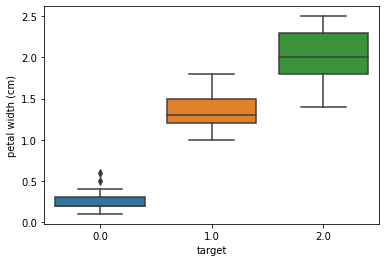

In [2]:
# data is perfectly balanced
sns.countplot(x='target', data=iris)

# not much of outliers to br handled
for feature in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
    sns.boxplot(x='target', y=feature, data=iris)
    plt.show()

### Plotting a 2-D graph

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

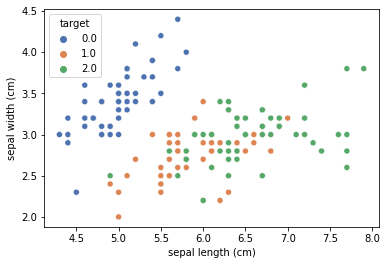

In [3]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, hue='target', palette="deep")

### Separating features and target

In [4]:
# X variable contains flower features
# Y variable contains target values

X = iris.drop(['target'], axis=1)
y = iris['target']

### Split the dataset into train and test sets

In [5]:
# 60% of the data will be randomly selected at training data
# remaining 40% as testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [6]:
# checking accuracy score for k-value rangin from 1 to 26

k_range = list(range(1,26))
scores = []

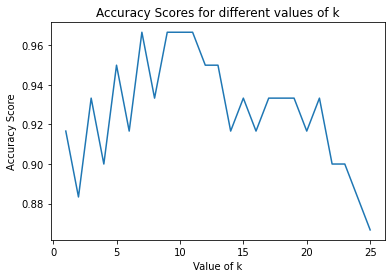

In [7]:
#model fitting and calculating accuracy score
# for each k-value in the range 1-26

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

# 60% of the data will be randomly selected at training data
# remaining 40% as testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

### Initial model

In [8]:
# Initial model with nearest neighbor as 1(k-value)
# further, k will be replaced with optimal value

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9666666666666667


### Finding the right k-value

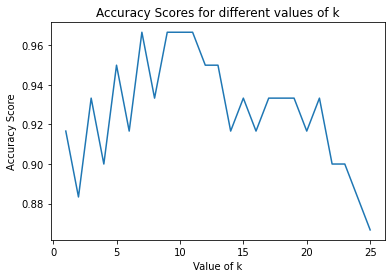

In [9]:
# checking accuracy score for k-value rangin from 1 to 26

k_range = list(range(1,26))
scores = []

# model fitting and calculating accuracy score
# for each k-value in the range 1-26

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

### Accuracy for optimal k-value

In [10]:
# 11 is the optimal k-value for this dataset

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9666666666666667


### Predicting class of new data

In [11]:
knn = KNeighborsClassifier(n_neighbors=11)

# fitting the entire data without splitting
# into train and test

knn.fit(iris.drop(['target'], axis=1), iris['target'])

# new data to be classified
X_new = np.array([[5.0,3.6,1.4,0.2]])
prediction = knn.predict(X_new)
print(prediction)

if prediction[0] == 0.0:
  print('Setosa')
elif prediction[0] == 1.0:
  print('Versicolor')
else:
  print('Virginica')

[0.]
Setosa


## Questions

In [ ]:
# Using the iris.ipynb file Our choice of 10 for K was completely out of thin air, I just made that up.

'''
1) How does this respond to different K values? Do you get better results with a higher value of K, or with a lower value of K? 
   Does it matter?

2) Come up with your test dataset and check what the prediction is.
'''

### 1) How does this respond to different K values? Do you get better results with a higher value of K, or with a lower value of K?     Does it matter?

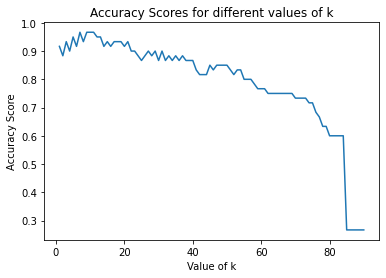

In [12]:
# K Values from 1 to 91 as maximum 

k_range = list(range(1,91))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

# From the graph we can observe that the accuracy keeps reduces as the value of 'K' increases. Hence, using higher 'K' values
# becomes redundant.

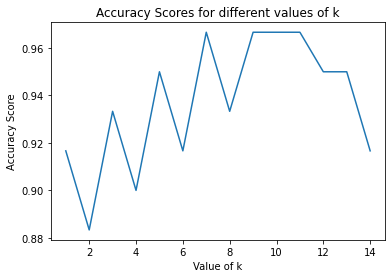

In [13]:
# K value detailed from 1 - 15

k_range = list(range(1,15))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

# From the below graph we can observe that the maximim accuracy of 'K' close to 0.97 is observed
# at 'K' values equal to 7 ; 9 ; 10 ; 11.

# So, we can conclude that using lower values 'K' for the KNN Classifier, we can achieve higher efficiency.

### 2) Come up with your test dataset and check what the prediction is.

In [14]:
# Maximum dimensions biologically observed from the dataframe.

iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
display(iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [16]:
'''Splitting values X and Y'''

X = iris.iloc[ : , :-1].values
Y = iris.iloc[ : , -1].values



'''Splitting the dataset into training and test sets'''

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)



'''Choosing 10 as the Optimal Value after graphing'''

classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, Y_train)

print(f'Random State = 1\nFor Split Ratio (Train:Test = 80:20)\nKNN Score Achieved = {knn.score(X_test, Y_test)}', end = '\n\n')



'''Predicting new data'''

New_Data_Test = [7.7, 3.8, 6.7, 2.2]
X_new = np.array([New_Data_Test])
prediction = knn.predict(X_new)
print(f'Predicting new data - {New_Data_Test}')

if prediction[0] == 0.0:
  print(f'Value - {int(prediction)} : Setosa')
elif prediction[0] == 1.0:
  print(f'Value - {int(prediction)} : Versicolor')
else:
  print(f'Value - {int(prediction)} : Virginica')



'''Predicting and Comparing Test Result'''

Predict_X_test = classifier.predict(X_test)

print('Test Result Comparison : P - Predicted Value and A - Actual Value\n')
print('--P||A--')
print(np.concatenate((Predict_X_test.reshape(len(Predict_X_test),1),Y_test.reshape(len(Y_test),1)),1))



'''Confusion Matrix'''

cm = confusion_matrix(Y_test, Predict_X_test)
print(f'\nConfusion Matrix')
print('S - Setosa     ; NS - Not Setosa\nV - Versicolor ; NV - Not Versicolor\nC - Virginica  ; NC - Not Virginica')
print('\n[S ][NS][NS]\n[NV][V ][NV]\n[NC][NC][C ]')
print(f'\n{cm}\n')

Random State = 1
For Split Ratio (Train:Test = 80:20)
KNN Score Achieved = 1.0

Predicting new data - [7.7, 3.8, 6.7, 2.2]
Value - 2 : Virginica
Test Result Comparison : P - Predicted Value and A - Actual Value

--P||A--
[[0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [2. 2.]
 [0. 0.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [2. 1.]
 [0. 0.]
 [2. 2.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [2. 2.]]

Confusion Matrix
S - Setosa     ; NS - Not Setosa
V - Versicolor ; NV - Not Versicolor
C - Virginica  ; NC - Not Virginica

[S ][NS][NS]
[NV][V ][NV]
[NC][NC][C ]

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]



In [ ]:
#From the above prediction, we can deduce the following points -

'''
1) From the KNN Score achieved, we can see that the prediction value was 96%. 
   It is a good score for 80:20 - Train:Test Split and 'Random_State' marked as True .

2) The dimensional parameters provided to the model for prediction was from 'Virginica' for which the model was accurately 
   able to predict.

3) From the Test Data as we can see, the model accurately predicts the expected value but renders 1 error value which can be 
   seen in the confusion matrix for the flower - 'Versicolor'.
'''